In [6]:
%matplotlib inline
import pandas as pd
from sklearn import tree
import numpy as np
import seaborn as sns

np.random.seed(0)

d_train_iris = pd.read_csv('d://1/stepic_lesson/train_iris.csv', index_col=0)
train_Y = d_train_iris.species
d_train_iris.drop(columns='species', inplace=True)

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy' )

In [15]:
clf.fit(d_train_iris, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
clf.score(d_train_iris, train_Y)

1.0

In [41]:
d_test_iris = pd.read_csv('d://1/stepic_lesson/test_iris.csv', index_col=0)
test_Y=d_test_iris.species
d_test_iris.drop(columns='species', inplace=True)
clf.score(d_test_iris, test_Y)

0.92

In [43]:
calc_score = pd.DataFrame()

for x in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy' , max_depth=x)
    clf.fit(d_train_iris,train_Y)
    
    train_score = clf.score(d_train_iris,train_Y)
    test_score = clf.score(d_test_iris,test_Y)
    
    temp_score_DF = pd.DataFrame({ 'max_depth': [x], 'train_score': [train_score], 'test_score': [test_score]})
#    print({ 'max_score': [x], 'train_score': [train_score], 'test_score': [test_score]})
#    print(temp_score_DF)
    calc_score = calc_score.append(temp_score_DF)
    
calc_score.head(15)

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.94
0,6,1.00,0.92
0,7,1.00,0.94
0,8,1.00,0.94
0,9,1.00,0.92
0,10,1.00,0.94


In [44]:
calc_score_long = pd.melt(calc_score, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')
calc_score_long.shape

(198, 3)

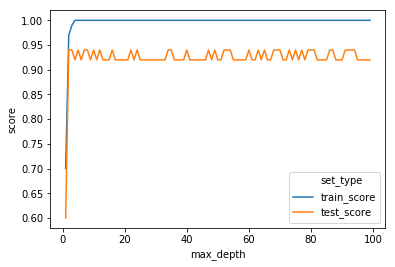

In [48]:
sns.lineplot(data=calc_score_long, x='max_depth', y='score', hue='set_type')

In [1]:
#2.4 Обучение, переобучение, недообучение и кросвалидация Exercise 15
%matplotlib inline
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

np.random.seed(0)



d_train_cat = pd.read_csv('d://1/stepic_lesson/dogs_n_cats.csv')

d_train_cat_Y=d_train_cat['Вид']
d_train_cat.drop(columns='Вид', inplace=True)

X_train, X_test, y_train, y_test =  train_test_split(d_train_cat, d_train_cat_Y, test_size=0.25, random_state=42)

calc_score = pd.DataFrame()

for test_max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=test_max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    predict = clf.predict(X_test)
    
    val_score = cross_val_score(clf, X_train, y_train, cv=5)
    print(test_max_depth, train_score, test_score, val_score)
    break
    
    
#print(predict)

precision = precision_score(y_true=y_test, y_pred=predict, average='macro' )
print(precision)

1 1.0 1.0 [1. 1. 1. 1. 1.]
1.0


In [2]:

from graphviz import Source
from IPython.display import SVG, display

from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

import sklearn
graph = Source(sklearn.tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X_train),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

[Text(170.9,168.33,'X[0] <= 14.5\nentropy = 1.0\nsamples = 750\nvalue = [372, 378]'),
 Text(85.45,56.11,'entropy = 0.0\nsamples = 372\nvalue = [372, 0]'),
 Text(256.35,56.11,'entropy = 0.0\nsamples = 378\nvalue = [0, 378]')]

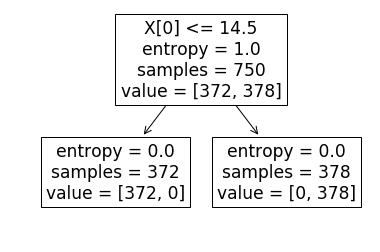

In [3]:
tree.plot_tree(clf) 

In [4]:
d_pred= pd.read_json( 'd://1/stepic_lesson/dataset_209691_15.txt')
hh = clf.predict(d_pred)
h_pred = pd.Series(hh)
h_pred.value_counts()

собачка    57
котик      43
dtype: int64

[Text(170.9,187.033,'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(85.45,112.22,'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(42.725,37.4067,'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(128.175,37.4067,'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(256.35,112.22,'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(213.625,37.4067,'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(299.075,37.4067,'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

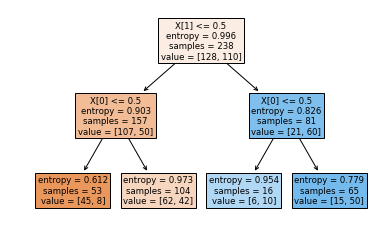

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

d_heart = pd.read_csv('d://1/stepic_lesson/train_data_tree.csv')
# max_depth=5, min_samples_split = 5)
dt = DecisionTreeClassifier(criterion='entropy')


y_train = d_heart.num
X_train = d_heart.drop(columns='num')
dt.fit(X_train, y_train)
tree.plot_tree(dt, filled=True)

In [2]:
E_YX = (157/238)*0.903 + (81/238)*0.826
IG = 0.996 - E_YX
IG

0.11920588235294116

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted

array([0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0,
       1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0])

In [16]:
from sklearn.model_selection import StratifiedKFold
X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))


[1 2 3 6 7 8 9] [0 4 5]
[0 2 3 4 5 8 9] [1 6 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 2 4 5 6 7 8] [3 9]


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

clf = DecisionTreeClassifier()
parameters = {'max_depth': range(1,11), 'min_samples_split': range(2,11) , 'min_samples_leaf': range(1,11)}
search = RandomizedSearchCV(clf, parameters)
search.fit(x,y)
best_tree = search.best_estimator_

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
search.best_score_

0.96

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
train=pd.read_csv('d://1/stepic_lesson/train_iris.csv', index_col=0)
train.rename(columns = {'species':'y'}, inplace=True)
#x = iris.data
#y = iris.target
print(train.columns)

y=train.y
x=train.drop(columns='y')

clf = DecisionTreeClassifier()
parameters = {'max_depth': range(1,11), 'min_samples_split': range(2,11) , 'min_samples_leaf': range(1,11)}
search = GridSearchCV(clf, parameters)
search.fit(x,y)
best_tree = search.best_estimator_

predictions = search.predict(test)
search.best_score_

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'y'], dtype='object')


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.98

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth = 5)
rf.fit(x,y)
rf.predict(x)

array([2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0,
       1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1], dtype=int64)

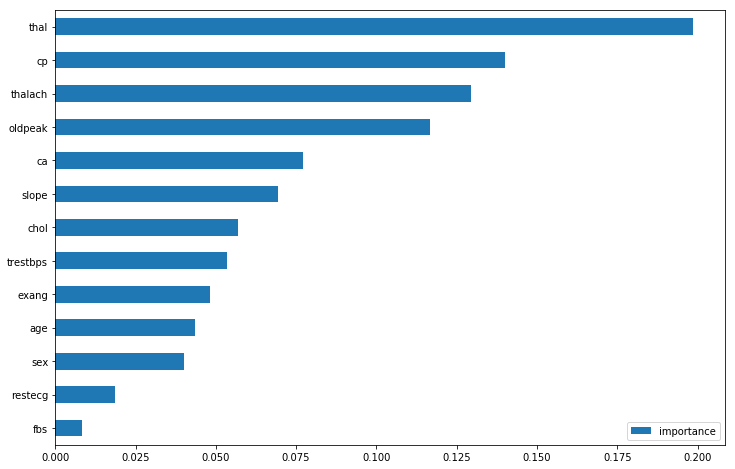

In [18]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

heart_dat=pd.read_csv(r'd:/1/stepic_lesson/heart.csv')

y= heart_dat.target
x = heart_dat.drop(columns='target')

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
x.head()
rf.fit(x,y)

imp = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

mushroom_dat = pd.read_csv(r'd:/1/stepic_lesson/training_mush.csv')

y=mushroom_dat['class']
x=mushroom_dat.drop(columns='class')

clf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': range(10,51,10),'max_depth': range(1,12,2), 'min_samples_split': range(2,10,2) , 'min_samples_leaf': range(1,8)}
grid = GridSearchCV(clf, parameters, cv=3)
grid.fit(x,y)
grid.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

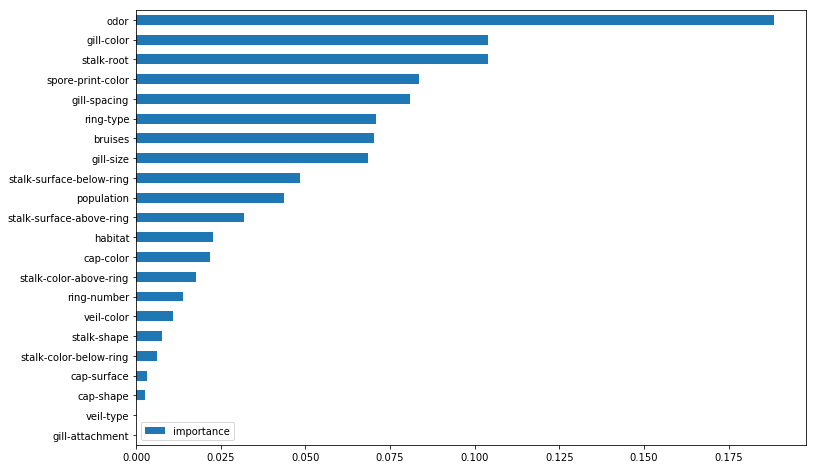

In [2]:
clf_best = grid.best_estimator_
clf_best.fit(x,y)
imp = pd.DataFrame(clf_best.feature_importances_, index=x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [9]:
test_mushroom_dat = pd.read_csv(r'd:/1/stepic_lesson/testing_mush.csv')
mushrum_predict = clf_best.predict(test_mushroom_dat)
mushrum_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

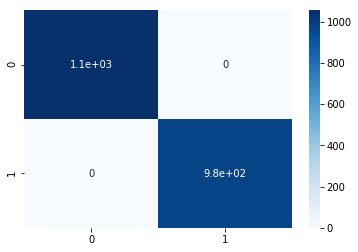

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mushrum_right_y = pd.read_csv(r'd:/1/stepic_lesson/testing_y_mush.csv/')
mushrum_confusuin_matrix = confusion_matrix(mushrum_right_y, mushrum_predict)
sns.heatmap(mushrum_confusuin_matrix, annot=True, cmap="Blues")

In [4]:
#3.5 И на Марсе будут яблони цвести Exercize 5
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

juke_dat = pd.read_csv(r'd:/1/stepic_lesson/invasion.csv')

y, uniques_names = pd.factorize(juke_dat['class'])
x = juke_dat.drop(columns='class')

train_X, test_X, train_y, test_y = train_test_split(x, y , test_size=0.2)

clf = RandomForestClassifier()
parameters = {'n_estimators': range(10,51,10),'max_depth': range(1,12,2), 
              'min_samples_split': range(2,10,2) , 'min_samples_leaf': range(1,8)}
grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(train_X,train_y)
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
pred_test_y = grid.predict(test_X)

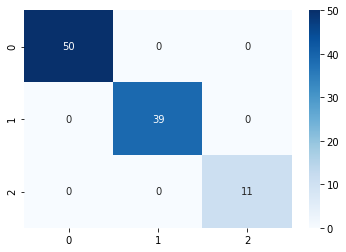

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

juke_confusuin_matrix = confusion_matrix(test_y, pred_test_y)
sns.heatmap(juke_confusuin_matrix, annot=True, cmap="Blues")

In [28]:
juke_operative = pd.read_csv(r'd:/1/stepic_lesson/operative_information.csv')
y_operative = grid.predict(juke_operative)
y_oper_ser = pd.Series(y_operative)
list(zip(uniques_names,pd.Series(y_oper_ser.value_counts()).sort_index().to_list()))

[('transport', 595), ('fighter', 675), ('cruiser', 230)]

In [57]:
# 3.5 И на Марсе будут яблони цвести Exercize 6
df_feature = pd.DataFrame(grid.best_estimator_.feature_importances_, index=train_X.columns, columns=['impotance_feature'])
df_feature.sort_values(by=['impotance_feature'], ascending=False)


,impotance_feature
volume,0.444542
speed,0.172073
g_reflection,0.152463
brightness,0.145330
i_reflection,0.085482
time_of_observance,0.000110


In [63]:
#3.5 И на Марсе будут яблони цвести xercize 7

dang_dat = pd.read_csv(r'd:/1/stepic_lesson/space_can_be_a_dangerous_place.csv')
X = dang_dat.drop(columns= ['r','phi','peradventure_index','dustiness', 'dangerous'])
Y = dang_dat['dangerous']
clf = RandomForestClassifier()
clf.fit(X,Y)
df_feature = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['impotance_feature'])
df_feature.sort_values(by=['impotance_feature'], ascending=False)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,impotance_feature
buggers_were_noticed,0.567937
nearby_system_has_planemo,0.417746
black_hole_is_near,0.014318
